# Nominados al Oscar en las principales categorías

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

print("Numpy version : ", np.__version__)
print("Pandas version : ", pd.__version__)
print("Sklearn version : ", sk.__version__)

Numpy version :  1.16.3
Pandas version :  0.24.2
Sklearn version :  0.20.3


Ejecutar esta notebook con las siguientes versiones de Numpy, Pandas y Sklearn:
<ul>
<li>Numpy version :  1.16.3</li>
<li>Pandas version :  0.24.2</li>
<li>Sklearn version :  0.20.3</li>
</ul>

LA NOTEBOOK TARDA ENTRE 3 Y 4 MINUTOS EN EJECUTARSE, DEBIDO AL GRID SEARCH.

## Preprocesamiento y limpieza del dataset

Primero importamos las librerias que vamos a utilizar y guardamos el CSV que contiene el dataset crudo en un DataFrame de Pandas, el cual procesaremos para ajustarlo a los objetivos del trabajo. 

In [2]:
# Lectura del dataset. Columna movie_id utilizada como index. Valores 'Yes' parseados como True
# y 'No' como False. na_filter = False para que los empty strings no se conviertan a NaN automáticamente.
df = pd.read_csv('BigML.csv', encoding='utf-8', index_col='movie_id', true_values=['Yes'], 
                   false_values=['No'], na_filter=False)

n_samples = df.shape[0] # Cantidad de registros

Las principales categorías de los premios Oscar, que en su conjunto hacen a una buena película, son:
- Mejor película
- Mejor director
- Mejor actor
- Mejor actriz
- Mejor actor de reparto
- Mejor actriz de reparto 
- Mejor guion original
- Mejor guion adaptado

A continuación definimos arrays con las principales categorías, tal como aparecen en las columnas del DataFrame, para los premios Oscar y también para los premios Golden Globe, BAFTA, premios del sindicato de Actores, Directores y Escritores, premios de la Crítica Cinematográfica y premios de Elección del Público:

In [3]:
oscar_major_categs = ['Best Achievement in Directing', 
              'Best Motion Picture of the Year', 
              'Best Performance by an Actor in a Leading Role', 
              'Best Performance by an Actress in a Leading Role', 
              'Best Performance by an Actor in a Supporting Role', 
              'Best Performance by an Actress in a Supporting Role',
              'Best Adapted Screenplay', 
              'Best Original Screenplay']

gg_major_categs = ['Best Director - Motion Picture', 'Best Motion Picture - Comedy or Musical',
                   'Best Motion Picture - Drama', 'Best Motion Picture - Musical or Comedy',
                   'Best Performance by an Actor in a Motion Picture - Comedy or Musical',
                   'Best Performance by an Actor in a Motion Picture - Drama',
                   'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
                   'Best Performance by an Actor in a Supporting Role in a Motion Picture',
                   'Best Performance by an Actress in a Motion Picture - Comedy or Musical',
                   'Best Performance by an Actress in a Motion Picture - Drama',
                   'Best Performance by an Actress in a Motion Picture - Musical or Comedy',
                   'Best Performance by an Actress in a Supporting Role in a Motion Picture',
                   'Best Screenplay - Motion Picture']

bafta_major_categs = ['Best Actor in a Leading Role', 'Best Actor in a Supporting Role',
                      'Best Actress in a Leading Role', 'Best Actress in a Supporting Role', 
                      'Best Adapted Screenplay', 'Best Director', 'Best Feature Film', 'Best Film',
                      'Best Leading Actor', 'Best Leading Actress', 'Best Original Screenplay',
                      'Best Performance by an Actor in a Leading Role', 
                      'Best Performance by an Actor in a Supporting Role',
                      'Best Performance by an Actress in a Leading Role', 
                      'Best Performance by an Actress in a Supporting Role', 'Best Screenplay (Adapted)', 
                      'Best Screenplay (Original)', 'Best Screenplay - Adapted', 'Best Screenplay - Original',
                      'Best Supporting Actor', 'Best Supporting Actress']

actors_guild_major_categs = ['Outstanding Performance by a Female Actor in a Leading Role',
                             'Outstanding Performance by a Female Actor in a Supporting Role',
                             'Outstanding Performance by a Male Actor in a Leading Role',
                             'Outstanding Performance by a Male Actor in a Supporting Role']

directors_guild_major_categs = ['Outstanding Directorial Achievement in Feature Film',
                                'Outstanding Directorial Achievement in Motion Pictures',
                                'Outstanding Directorial Achievement of a First-Time Feature Film Director']

writers_guild_major_categs = ['Adapted Screenplay', 'Best Adapted Screenplay', 'Best Original Screenplay', 
                              'Original Screenplay']

people_choice_major_categs = ['Drama Movie Star', 'Favorite Action Movie', 'Favorite Comedic Movie',
                              'Favorite Comedy Motion Picture', 'Favorite Comedy Movie',
                              'Favorite Drama Movie', 'Favorite Dramatic Motion Picture',
                              'Favorite Dramatic Movie', 'Favorite Family Movie', 'Favorite Horror Movie', 
                              'Favorite Motion Picture', 'Favorite Move Fan Following', 'Favorite Movie', 
                              'Favorite Movie Comedy', 'Favorite Movie Drama', 'Favorite Movie Superhero', 
                              'Favorite Sequel', 'Favorite Threequel', 'Favorite Thriller Movie',
                              'Favorite Year End Blockbuster', 'Favorite Year End Movie']

critics_choice_major_categs = ['Best Acting Ensemble', 'Best Actor', 'Best Actor in a Comedy', 
                               'Best Actor in a Comedy Movie', 'Best Actor in an Action Movie', 'Best Actress',
                               'Best Actress in a Comedy', 'Best Actress in an Action Movie',
                               'Best Adapted Screenplay', 'Best Comedy', 'Best Comedy Movie', 'Best Director', 
                               'Best Family Film', 'Best Family Film (Live Action)', 
                               'Best Family Film - Live Action', 'Best Original Screenplay', 'Best Picture', 
                               'Best Popular Movie', 'Best Sci-Fi/Horror Movie', 'Best Screenplay',
                               'Best Screenplay, Adapted', 'Best Screenplay, Original', 'Best Supporting Actor', 
                               'Best Supporting Actress', 'Best Young Actor', 'Best Young Actor/Actress', 
                               'Best Young Actor/Actress (Under 21)', 'Best Young Actress']

In [4]:
df.head()

year                                              movie  \
movie_id                                                             
tt0035423  2001                                     Kate & Leopold   
tt0120630  2000                                        Chicken Run   
tt0120667  2005                                     Fantastic Four   
tt0120679  2002                                              Frida   
tt0120737  2001  The Lord of the Rings: The Fellowship of the Ring   

          certificate  duration                       genre  rate metascore  \
movie_id                                                                      
tt0035423       PG-13       118      Comedy|Fantasy|Romance   6.4        44   
tt0120630           G        84  Animation|Adventure|Comedy   7.0        88   
tt0120667       PG-13       106     Action|Adventure|Family   5.7        40   
tt0120679           R       123     Biography|Drama|Romance   7.4        61   
tt0120737       PG-13       178     Adventure|Drama|Fantasy   8.8        92   

                                                    synopsis    votes  \
movie_id                                                                
tt0035423  An English Duke from 1876 is inadvertedly drag...    66660   
tt0120630  When a cockerel apparently flies into a chicke...   144475   
tt0120667  A group of astronauts gain superpowers after a...   273203   
tt0120679  A biography of artist Frida Kahlo, who channel...    63852   
tt0120737  A meek Hobbit from the Shire and eight compani...  1286275   

               gross  ... New_York_Film_Critics_Circle_nominated  \
movie_id              ...                                          
tt0035423   47100000  ...                                      0   
tt0120630  106790000  ...                                      1   
tt0120667  154700000  ...                                      0   
tt0120679   25780000  ...                                      0   
tt0120737  313840000  ...                                      0   

          New_York_Film_Critics_Circle_nominated_categories  \
movie_id                                                      
tt0035423                                                     
tt0120630                                Best Animated Film   
tt0120667                                                     
tt0120679                                                     
tt0120737                                                     

          Los_Angeles_Film_Critics_Association_won  \
movie_id                                             
tt0035423                                        0   
tt0120630                                        1   
tt0120667                                        0   
tt0120679                                        0   
tt0120737                                        1   

          Los_Angeles_Film_Critics_Association_won_categories  \
movie_id                                                        
tt0035423                                                       
tt0120630                                     Best Animation    
tt0120667                                                       
tt0120679                                                       
tt0120737                                         Best Music    

           Los_Angeles_Film_Critics_Association_nominated  \
movie_id                                                    
tt0035423                                               0   
tt0120630                                               1   
tt0120667                                               0   
tt0120679                                               0   
tt0120737                                               2   

           Los_Angeles_Film_Critics_Association_nominated_categories  \
movie_id                                                               
tt0035423                                                              
tt0120630                                     Best Anima

Vemos que los campos <i>genre</i> y los campos de las categorías para los diferentes premios son del tipo string con  el operador pipe '|' utilizado como separador. Para poder trabajar con esos campos necesitamos convertirlos a arrays de string:

In [5]:
# Esta función recibe una dada fila x del DataFrame y transforma los campos de string a array de string 
# utilizando el '|' como separador
def strToArray(x):
    x.loc['genre', 'Oscar_nominated_categories', 'Golden_Globes_nominated_categories',
          'BAFTA_nominated_categories', 'Screen_Actors_Guild_nominated_categories',
          'Critics_Choice_nominated_categories', 'Directors_Guild_nominated_categories',
          'Writers_Guild_nominated_categories', 
          'People_Choice_nominated_categories'] = [np.array(x['genre'].split('|')),
                                                   np.array(x['Oscar_nominated_categories'].split('|')),
                                                   np.array(x['Golden_Globes_nominated_categories'].split('|')),
                                                   np.array(x['BAFTA_nominated_categories'].split('|')),
                                                   np.array(x['Screen_Actors_Guild_nominated_categories'].split('|')),
                                                   np.array(x['Critics_Choice_nominated_categories'].split('|')),
                                                   np.array(x['Directors_Guild_nominated_categories'].split('|')),
                                                   np.array(x['Writers_Guild_nominated_categories'].split('|')),
                                                   np.array(x['People_Choice_nominated_categories'].split('|'))]
    return x

# Aplico la función de arriba a cada fila del DataFrame
df = df.apply(strToArray, axis='columns')

In [6]:
# Array con todos los géneros posibles
genres = np.unique(np.concatenate(df.genre))

# Arrays con todas las diferentes categorías para cada tipo de premio. Utilizados solamente para seleccionar
# los principales de cada uno de ellos (mejor película, mejores actores, mejor director y mejor guion)
oscar_categories = np.unique(np.concatenate(df.Oscar_nominated_categories))
golden_globe_categories = np.unique(np.concatenate(df.Golden_Globes_nominated_categories))
bafta_categories = np.unique(np.concatenate(df.BAFTA_nominated_categories))
actors_guild_categories = np.unique(np.concatenate(df.Screen_Actors_Guild_nominated_categories))
critics_choice_categories = np.unique(np.concatenate(df.Critics_Choice_nominated_categories))
directors_guild_categories = np.unique(np.concatenate(df.Directors_Guild_nominated_categories))
writers_guild_categories = np.unique(np.concatenate(df.Writers_Guild_nominated_categories))
people_choice_categories = np.unique(np.concatenate(df.People_Choice_nominated_categories))

genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Histor', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Thriller', 'War', 'Western'], dtype='<U11')

Cada película puede pertenecer a más de un género, con lo cual hay que separar cada género en una columna distinta dentro de DataFrame (una columna <i>Action</i>, otra <i>Adventure</i>, otra <i>Drama</i>, etc). Una determinada película tendrá el valor <i>True</i> en cada columna del género a que pertenece y </i>False</i> en caso contrario. 

In [7]:
# Función que setea True/False a cada columna de género de una determinada fila x
def updateGenre(x, genres):
    for genre in genres:
        x[genre] = genre in x.genre
    return x

# Para cada género, creo una nueva columna y la seteo inicialmente en False para todas las filas.
for genre in genres:
    df[genre] = np.full((n_samples,1), False)

# Actualizo los géneros de todas las filas 
df = df.apply(lambda x: updateGenre(x, genres), axis='columns')

En el dataset original se cuenta la cantidad de nominaciones que tuvo una pelicula para cada uno de los diferentes premios (ej: campos <i>Oscar_nominated</i>, <i>Golden_Globes_nominated</i>, <i>BAFTA_nominated</i>, etc). Sin embargo, los valores de estos campos están originalmente mal computados (cuentan mal la cantidad de categorías para las que fue nominada la película) y además incluyen otras categorías que no son las de interés para este trabajo (ej: mejor diseño de vestuario, mejor maquillaje y peinado, mejor documental corto, etc).

Por eso a continuación generamos nosotros mismos esos campos, contando la cantidad de nominaciones en cada premio para las categorias principales que definimos en los arrays de más arriba:

In [8]:
# Cuenta la cantidad de nominaciones para un determinado premio para las principales categorías
def countNomin(row, majorCategs, categColum, nominCountColum):
    nominations = 0
    for category in majorCategs:
        if category in row.loc[categColum]:
            nominations += 1
            
    row.loc[nominCountColum] = nominations
    return row

df['Oscar_nominations'] = np.full((n_samples,1), 0)
df['GG_nominations'] = np.full((n_samples,1), 0)
df['BAFTA_nominations'] = np.full((n_samples,1), 0)
df['ActorsGuild_nominations'] = np.full((n_samples,1), 0)
df['CriticsChoice_nominations'] = np.full((n_samples,1), 0)
df['DirectorsGuild_nominations'] = np.full((n_samples,1), 0)
df['WritersGuild_nominations'] = np.full((n_samples,1), 0)
df['PeopleChoice_nominations'] = np.full((n_samples,1), 0)

df = df.apply(lambda x: countNomin(x, oscar_major_categs, 'Oscar_nominated_categories', 'Oscar_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, gg_major_categs, 'Golden_Globes_nominated_categories', 'GG_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, bafta_major_categs, 'BAFTA_nominated_categories', 'BAFTA_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, actors_guild_major_categs, 'Screen_Actors_Guild_nominated_categories', 'ActorsGuild_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, critics_choice_major_categs, 'Critics_Choice_nominated_categories', 'CriticsChoice_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, directors_guild_major_categs, 'Directors_Guild_nominated_categories', 'DirectorsGuild_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, writers_guild_major_categs, 'Writers_Guild_nominated_categories', 'WritersGuild_nominations'), axis='columns')
df = df.apply(lambda x: countNomin(x, people_choice_major_categs, 'People_Choice_nominated_categories', 'PeopleChoice_nominations'), axis='columns')


Ahora resta quedarse con las columnas de interés para el análisis. Descartamos todas aquellas relacionadas a premios que no tienen relación con las categorías principales (ej: American Cinema Editors, Costume Designer Guild, Art Director Guild, etc.) y premios menores que son otorgados en círculos mas chicos del cine (ej: Austin Film Critics Association, Denver Film Critics Society, etc.). También eliminamos las columnas de géneros que no aplican para los premios a las principales categorías (ej: cortos, documentales, etc).

In [9]:
# Este registro particular tenia un typo en el género: 'Histor' en lugar de 'History'. 
df.loc['tt1020072', 'History'] = True

# Nos quedamos solamente con las columnas de interés, descartando el resto.
df = df.loc[:, ['year', 'movie', 'duration', 'rate', 'metascore', 'votes', 'Oscar_nominations', 'GG_nominations', 
                'BAFTA_nominations', 'ActorsGuild_nominations', 'CriticsChoice_nominations', 
                'DirectorsGuild_nominations', 'WritersGuild_nominations', 'PeopleChoice_nominations', 
                'gross', 'release_date', 'user_reviews', 'critic_reviews', 'popularity', 'Action', 'Adventure', 
                'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Musical', 
                'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War']]

df.head()

year                                              movie  duration  \
movie_id                                                                       
tt0035423  2001                                     Kate & Leopold       118   
tt0120630  2000                                        Chicken Run        84   
tt0120667  2005                                     Fantastic Four       106   
tt0120679  2002                                              Frida       123   
tt0120737  2001  The Lord of the Rings: The Fellowship of the Ring       178   

           rate metascore    votes  Oscar_nominations  GG_nominations  \
movie_id                                                                
tt0035423   6.4        44    66660                  0               1   
tt0120630   7.0        88   144475                  0               1   
tt0120667   5.7        40   273203                  0               0   
tt0120679   7.4        61    63852                  1               1   
tt0120737   8.8        92  1286275                  4               2   

           BAFTA_nominations  ActorsGuild_nominations  ...  Family  Fantasy  \
movie_id                                               ...                    
tt0035423                  0                        0  ...   False     True   
tt0120630                  0                        0  ...   False    False   
tt0120667                  0                        0  ...    True    False   
tt0120679                  2                        2  ...   False    False   
tt0120737                  4                        1  ...   False     True   

           History  Horror Musical Mystery Romance Sci-Fi Thriller    War  
movie_id                                                                   
tt0035423    False   False   False   False    True  False    False  False  
tt0120630    False   False   False   False   False  False    False  False  
tt0120667    False   False   False   False   False  False    False  False  
tt0120679    False   False   False   False    True  False    False  False  
tt0120737    False   False   False   False   False  False    False  False  

[5 rows x 35 columns]

Convertimos los campos que representan un valor numérico pero se guardaron como string (debido a la existencia de datos faltantes) a un formato numérico.

In [10]:
df.metascore = pd.to_numeric(df.metascore)
df.user_reviews = pd.to_numeric(df.user_reviews)
df.gross = pd.to_numeric(df.gross)
df.critic_reviews = pd.to_numeric(df.critic_reviews)
df.popularity = pd.to_numeric(df.popularity)

Finalmente, eliminamos aquellas columnas que tengan una correlación muy baja (menor a 0.1 en valor absoluto) con la variable de clase (es decir, con <i>Oscar_nominations</i>).

In [11]:
# Calculamos la correlación de todas las variables numéricas (y booleanas) contra Oscar_nominations, exceptuando 'year'
corr = df.drop(columns='year').corrwith(df.Oscar_nominations, drop=True)
corr

duration                      0.199202
rate                          0.360180
metascore                     0.462174
votes                         0.142518
Oscar_nominations             1.000000
GG_nominations                0.821839
BAFTA_nominations             0.808314
ActorsGuild_nominations       0.789099
CriticsChoice_nominations     0.816166
DirectorsGuild_nominations    0.693973
WritersGuild_nominations      0.614237
PeopleChoice_nominations     -0.083201
gross                        -0.061356
user_reviews                  0.089237
critic_reviews                0.238588
popularity                   -0.041385
Action                       -0.238701
Adventure                    -0.159848
Animation                    -0.115359
Comedy                       -0.074722
Crime                         0.014241
Drama                         0.358003
Family                       -0.105989
Fantasy                      -0.077644
History                       0.093737
Horror                   

In [12]:
low_corr = (np.abs(corr) < 0.1)
low_corr_cols = low_corr[low_corr].index
df.drop(columns=low_corr_cols, inplace=True)
df.shape

(1235, 22)

## Partición de datos

Vamos a utilizar como conjunto de test a las películas de los últimos 3 años (2016-2018):

In [13]:
## Descartamos columnas que no participan como features de entrada a los clasificadores (nombre de pelicula y fecha)
df_input = df.drop(columns=['movie', 'release_date'])
df_input.dropna(inplace=True)

# Mascara que filtra las peliculas del 2016 en adelante
mask_latest = df_input['year'] >= 2016

# X contiene todos los features de entrada
X = df_input.drop(columns=['year', 'Oscar_nominations'])
X = X.astype(np.float64)

# Separamos la cantidad de nominaciones al Oscar como el target de salida
y = df_input.loc[:, ['Oscar_nominations']]

# Separamos en 3 clases: 0 nominaciones, 1 nominacion y más de una nominación (representado por el valor 2)
y[y.Oscar_nominations > 1] = 2
classes = [0, 1, 2]

# Partición de datos entre Test y Development.
Xtest = X[mask_latest]
ytest = y[mask_latest]

Xdev = X[~mask_latest]
ydev = y[~mask_latest]

A continuación vemos que se trata de un dataset cuyas clases están desbalanceadas. Del conjunto total, hay 868 películas que no fueron nominadas a ningún Oscar, 146 que fueron nominadas a 1 solo, y 185 que fueron nominadas a más de uno. 

In [14]:
freq_tab = pd.crosstab(index=y.Oscar_nominations, columns="count")
freq_tab

col_0              count
Oscar_nominations       
0                    868
1                    146
2                    185

## Arboles de decisión

A continuación definimos varias funciones que utilizaremos más abajo

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Función que ejecuta 5-fold cross validation según el clasificador pasado como parámetro
# Devuelve un objeto con las mediciones de accuracy y ROC AUC para cada fold tanto en training como en cv
def runCV(classifier, Xdev, ydev):
    # Utilizamos 5-fold stratificado, que selecciona las particiones al azar pero teniendo en cuenta la 
    # proporcion de datos pertenecientes a las diferentes clases (0, 1 o 2)
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

    # Arrays donde se guardan los diferentes scores para cada fold
    acc_cv, acc_train, auc_train, auc_cv = [], [], [], []

    # Para cada particion training + cross validation, calculamos las metricas y las guardamos en los arrays
    for train_index, test_index in skf.split(Xdev, ydev):
        Xtrain, Xcv = Xdev.iloc[train_index], Xdev.iloc[test_index]
        ytrain, ycv = ydev.iloc[train_index], ydev.iloc[test_index]
        classifier.fit(Xtrain, ytrain.values.ravel())    
        ytrain_pred = classifier.predict(Xtrain)
        ycv_pred = classifier.predict(Xcv)
        acc_train.append(accuracy_score(ytrain, ytrain_pred))
        acc_cv.append(accuracy_score(ycv, ycv_pred))
        auc_train.append(avgAUCScore(ytrain.values.ravel(), ytrain_pred))
        auc_cv.append(avgAUCScore(ycv.values.ravel(), ycv_pred))

    return {
        'acc_cv': acc_cv, 
        'acc_train': acc_train,
        'auc_train': auc_train, 
        'auc_cv': auc_cv
    }

# Función que calcula el ROC AUC score promedio cuando se tiene más de dos clases
# Recibe como parámetro el vector y target, el y estimado por el clasificador y un array con las clases.
# Calcula el ROC AUC score para cada clase contra el resto de las clases (binarizando cada clase)
# Devuelve el promedio de cada ROC AUC score calculado para cada clase.
def avgAUCScore(ytrue, ypred):
    auc_scores = []

    # Para cada clase
    for c in classes:
        ytrue_bin = np.zeros(ytrue.shape)
        ypred_bin = np.zeros(ypred.shape)

        # Binarizo target y estimacion
        ytrue_bin[ytrue != c] = 1
        ypred_bin[ypred != c] = 1

        auc_scores.append(roc_auc_score(ytrue_bin, ypred_bin))
    
    return np.mean(auc_scores)
        
# Muestra los resultados de acccuracy y ROC AUC score para cada fold, el promedio y el desvío estandar
def printResults(title, results):
    #fpr, tpr, thresholds = roc_curve(ley.transform(test_y), ley.transform(predictions))
    columns = ['Fold ' + str(i) for i in range(1,6)] + ['Media', 'Desvío']
    res = np.array([results['acc_train'], results['acc_cv'], results['auc_train'], results['auc_cv']])
    mean, stddev = [np.mean(res, axis=1), np.std(res, ddof=1, axis=1)]
    
    values = np.concatenate((res, mean.reshape((4,1)), stddev.reshape((4,1))), axis=1)
    values = np.around(values, decimals=4)
    
    table = pd.DataFrame({'Medición': ['Training Accuracy', 'CV Accuracy', 'Training ROC AUC', 'CV ROC AUC']})
    
    table = pd.concat([table, pd.DataFrame(values, columns=columns)], axis=1, sort=False)

    bold = '\033[1m'
    end = '\033[0m'

    print('{}------------ {} ------------{}'.format(bold, title, end))
    
    return table

# Función que grafica el arbol de decisión
def plotTree(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, class_names=np.array(["0", "1", "2"]),
                    feature_names=Xdev.columns, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

### 1. Árbol de decisión con altura máxima 3 y el resto de los parámetros por default

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Arbol con maxima altura = 3 y todos el resto de los parametros es default
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

results = runCV(tree, Xdev, ydev)

printResults('Altura máxima 3 - Resto de los parámetros por default', results)

------------ Altura máxima 3 - Resto de los parámetros por default ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.8686  0.8724  0.8782  0.8898  0.8770  0.8772  0.0080
1        CV Accuracy  0.8664  0.8698  0.8419  0.8465  0.8605  0.8570  0.0123
2   Training ROC AUC  0.8355  0.7890  0.8077  0.8138  0.8002  0.8092  0.0174
3         CV ROC AUC  0.8333  0.7895  0.7743  0.7355  0.7967  0.7859  0.0355

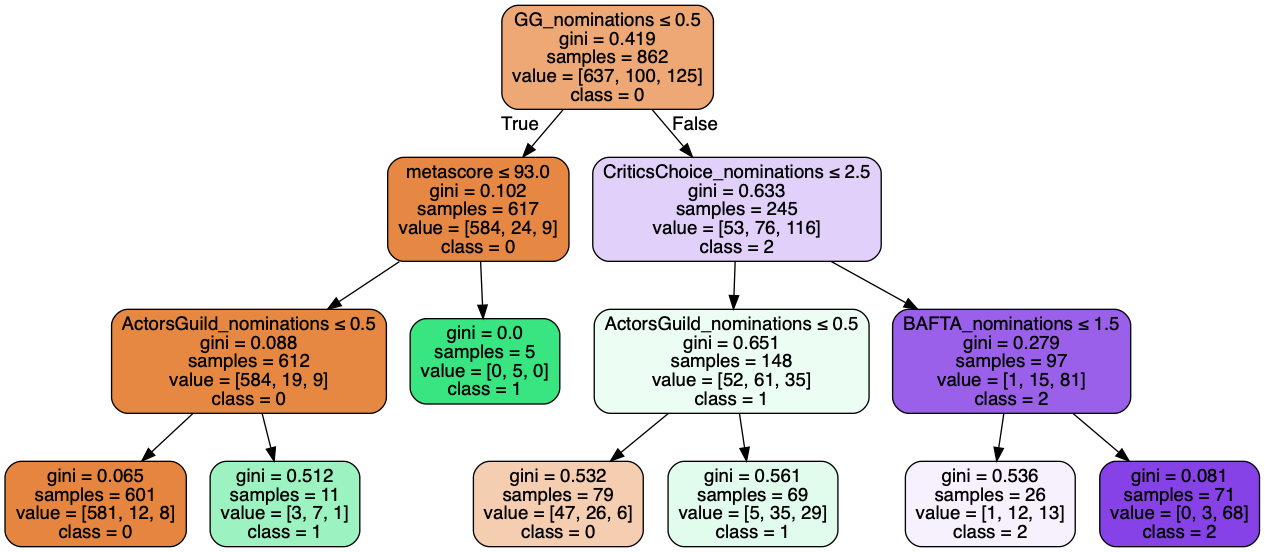

In [17]:
plotTree(tree)

### 2.A. Árbol de decisión con altura máxima 3 y utilizando Information Gain

In [18]:
# Arbol con maxima altura = 3 y criterio entropy
tree_alt3_ig = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

results = runCV(tree_alt3_ig, Xdev, ydev)

printResults("Altura máxima 3 - Criterio 'Entropy'", results)

------------ Altura máxima 3 - Criterio 'Entropy' ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.8709  0.8643  0.8701  0.8701  0.8666  0.8684  0.0028
1        CV Accuracy  0.8664  0.8605  0.8698  0.8512  0.8605  0.8616  0.0071
2   Training ROC AUC  0.7989  0.7604  0.7843  0.7783  0.7722  0.7788  0.0143
3         CV ROC AUC  0.7837  0.7608  0.7926  0.7514  0.7673  0.7712  0.0168

Gráfico del árbol con altura 3 y medida Information Gain

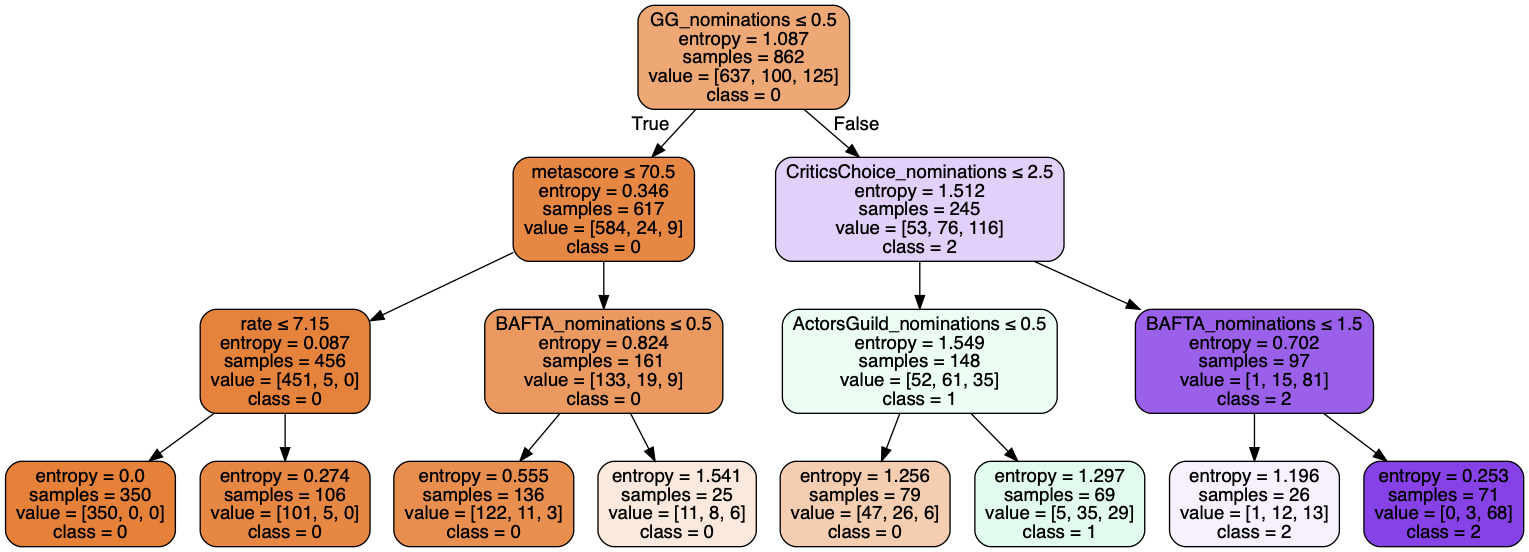

In [19]:
plotTree(tree_alt3_ig)

### 2.B. Árbol de decisión con altura máxima 6

In [20]:
# Arbol con maxima altura = 6 y criterio Gini
tree_alt6_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

results = runCV(tree_alt6_gini, Xdev, ydev)

printResults("Altura máxima 6 - Criterio 'Gini'", results)

------------ Altura máxima 6 - Criterio 'Gini' ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.9512  0.9524  0.9443  0.9513  0.9490  0.9496  0.0032
1        CV Accuracy  0.8894  0.8512  0.8465  0.8651  0.8791  0.8663  0.0182
2   Training ROC AUC  0.9478  0.9392  0.9181  0.9147  0.9249  0.9289  0.0141
3         CV ROC AUC  0.8634  0.8185  0.7946  0.7917  0.8502  0.8237  0.0323

In [21]:
# Arbol con maxima altura = 6 y criterio Entropy
tree_alt6_ig = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

results = runCV(tree_alt6_ig, Xdev, ydev)

printResults("Altura máxima 6 - Criterio 'Entropy'", results)

------------ Altura máxima 6 - Criterio 'Entropy' ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.9442  0.9478  0.9455  0.9420  0.9443  0.9448  0.0021
1        CV Accuracy  0.8802  0.8558  0.8465  0.8791  0.8419  0.8607  0.0180
2   Training ROC AUC  0.9033  0.9149  0.9275  0.9095  0.9287  0.9168  0.0111
3         CV ROC AUC  0.8067  0.8043  0.8033  0.8094  0.7925  0.8032  0.0065

Gráfico con altura máxima 6 y medida Gini

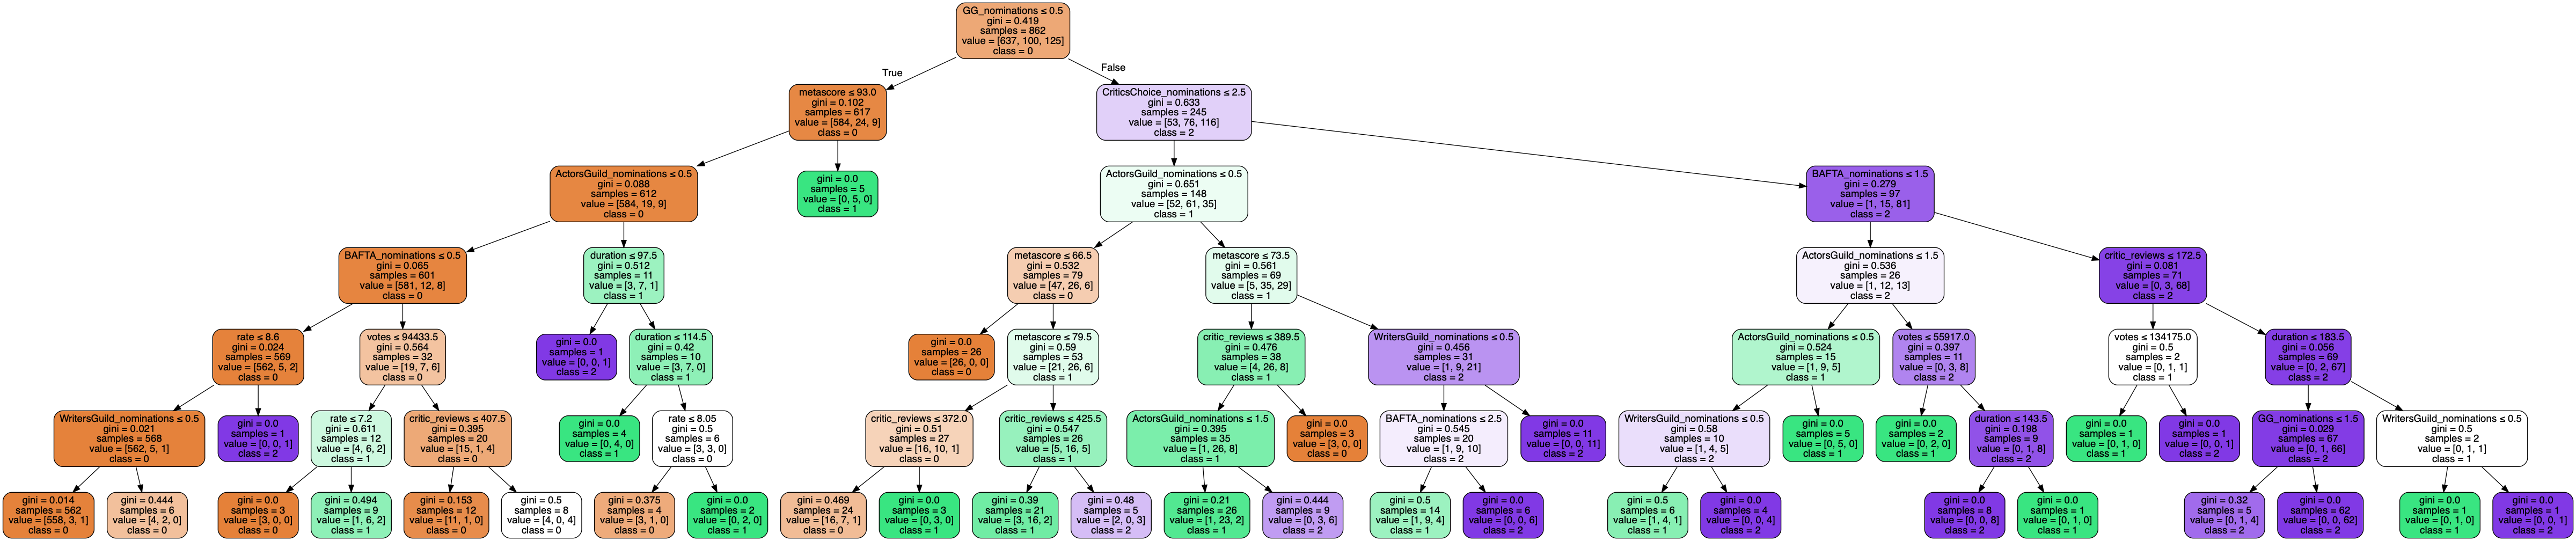

In [22]:
plotTree(tree_alt6_gini)

Gráfico con altura máxima 6 y medida Entropy

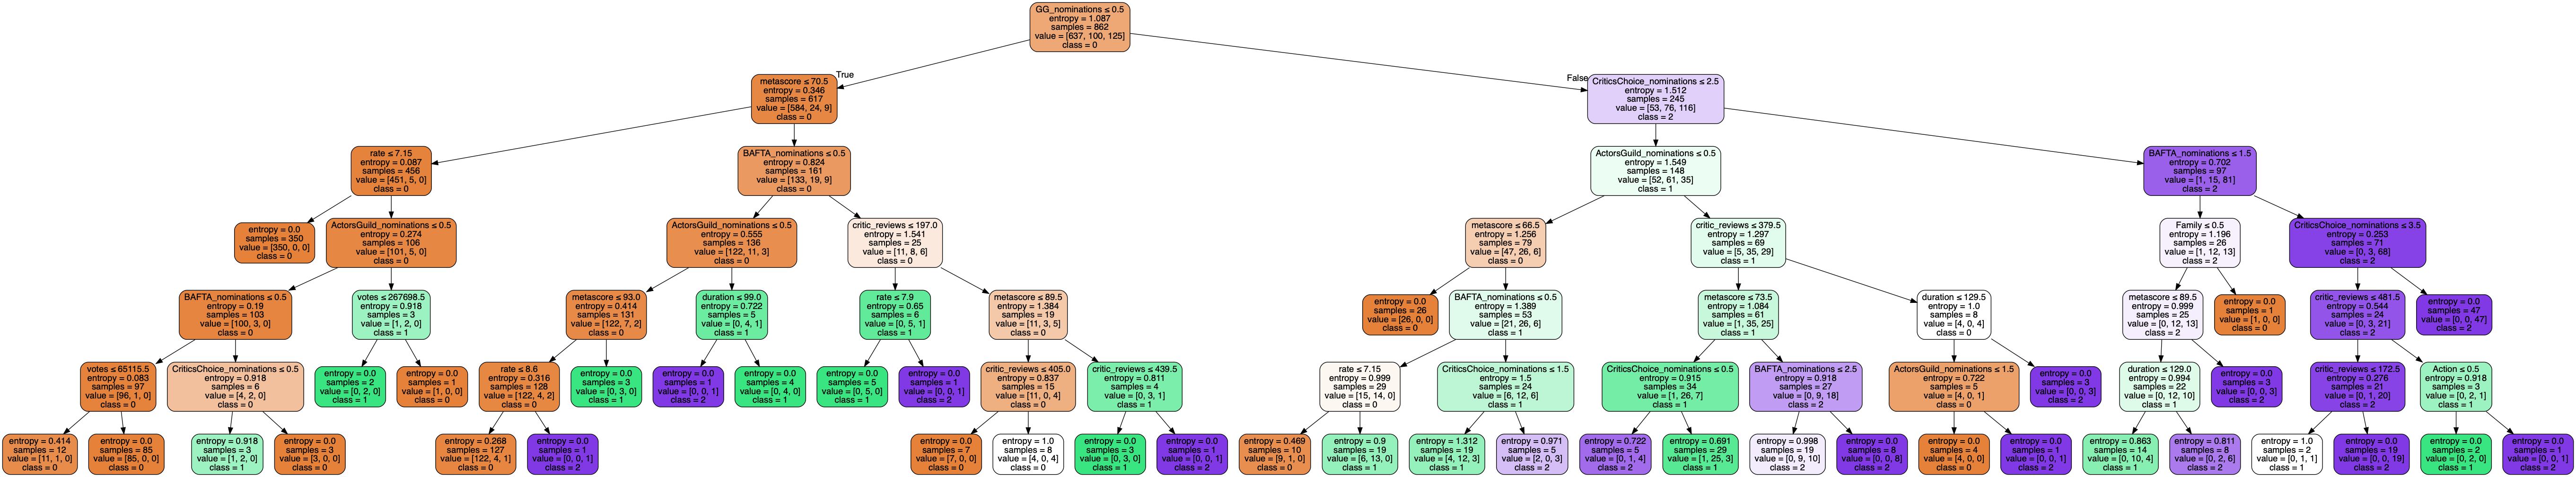

In [23]:
plotTree(tree_alt6_ig)

### 2.C. Árbol de decisión sin una altura máxima

In [24]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)

results = runCV(tree_gini, Xdev, ydev)

printResults("Sin altura máxima - Criterio 'Gini'", results)

------------ Sin altura máxima - Criterio 'Gini' ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  0.0000
1        CV Accuracy  0.8571  0.8512  0.8326  0.8651  0.8372  0.8486  0.0136
2   Training ROC AUC  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  0.0000
3         CV ROC AUC  0.8076  0.8201  0.7867  0.8164  0.8118  0.8085  0.0131

In [25]:
tree_ig = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)

results = runCV(tree_ig, Xdev, ydev)

printResults("Sin altura máxima - Criterio 'Entropy'", results)

------------ Sin altura máxima - Criterio 'Entropy' ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  0.0000
1        CV Accuracy  0.8756  0.8465  0.8419  0.8837  0.8279  0.8551  0.0236
2   Training ROC AUC  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  0.0000
3         CV ROC AUC  0.8374  0.7877  0.8069  0.8234  0.7783  0.8067  0.0245

Gráfico de árbol sin altura máxima y medida Gini

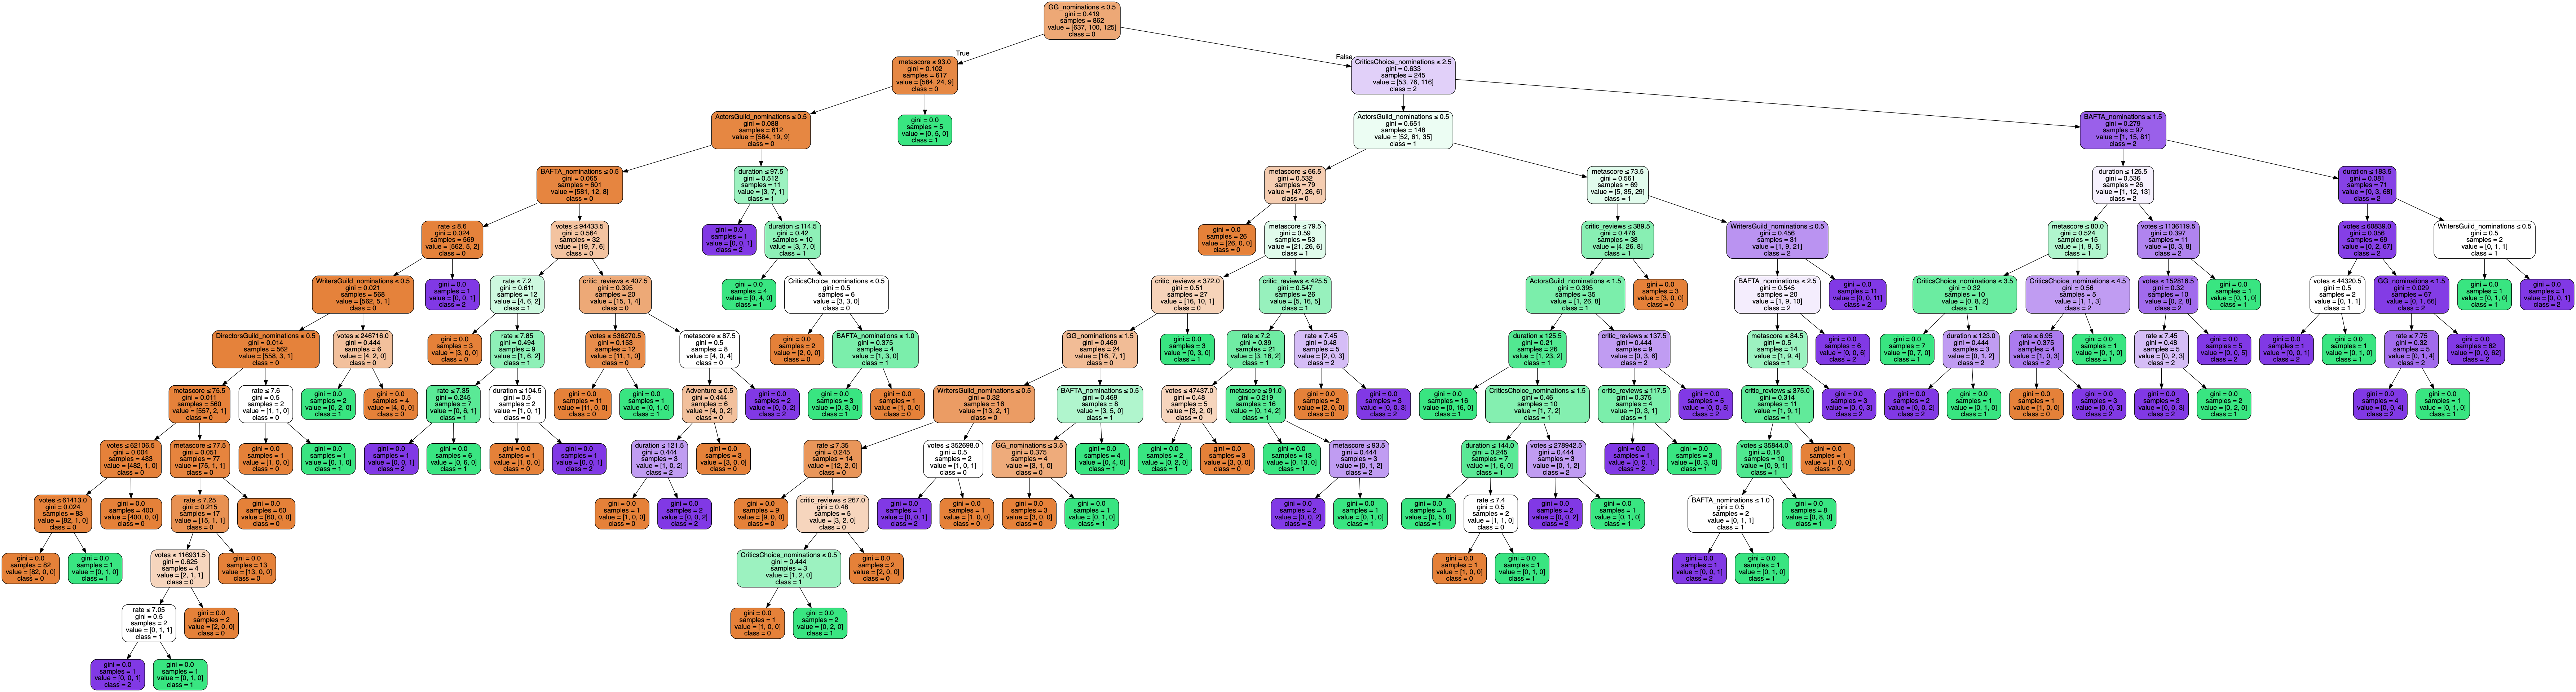

In [26]:
plotTree(tree_gini)

Gráfico de árbol sin altura máxima y medida Information Gain

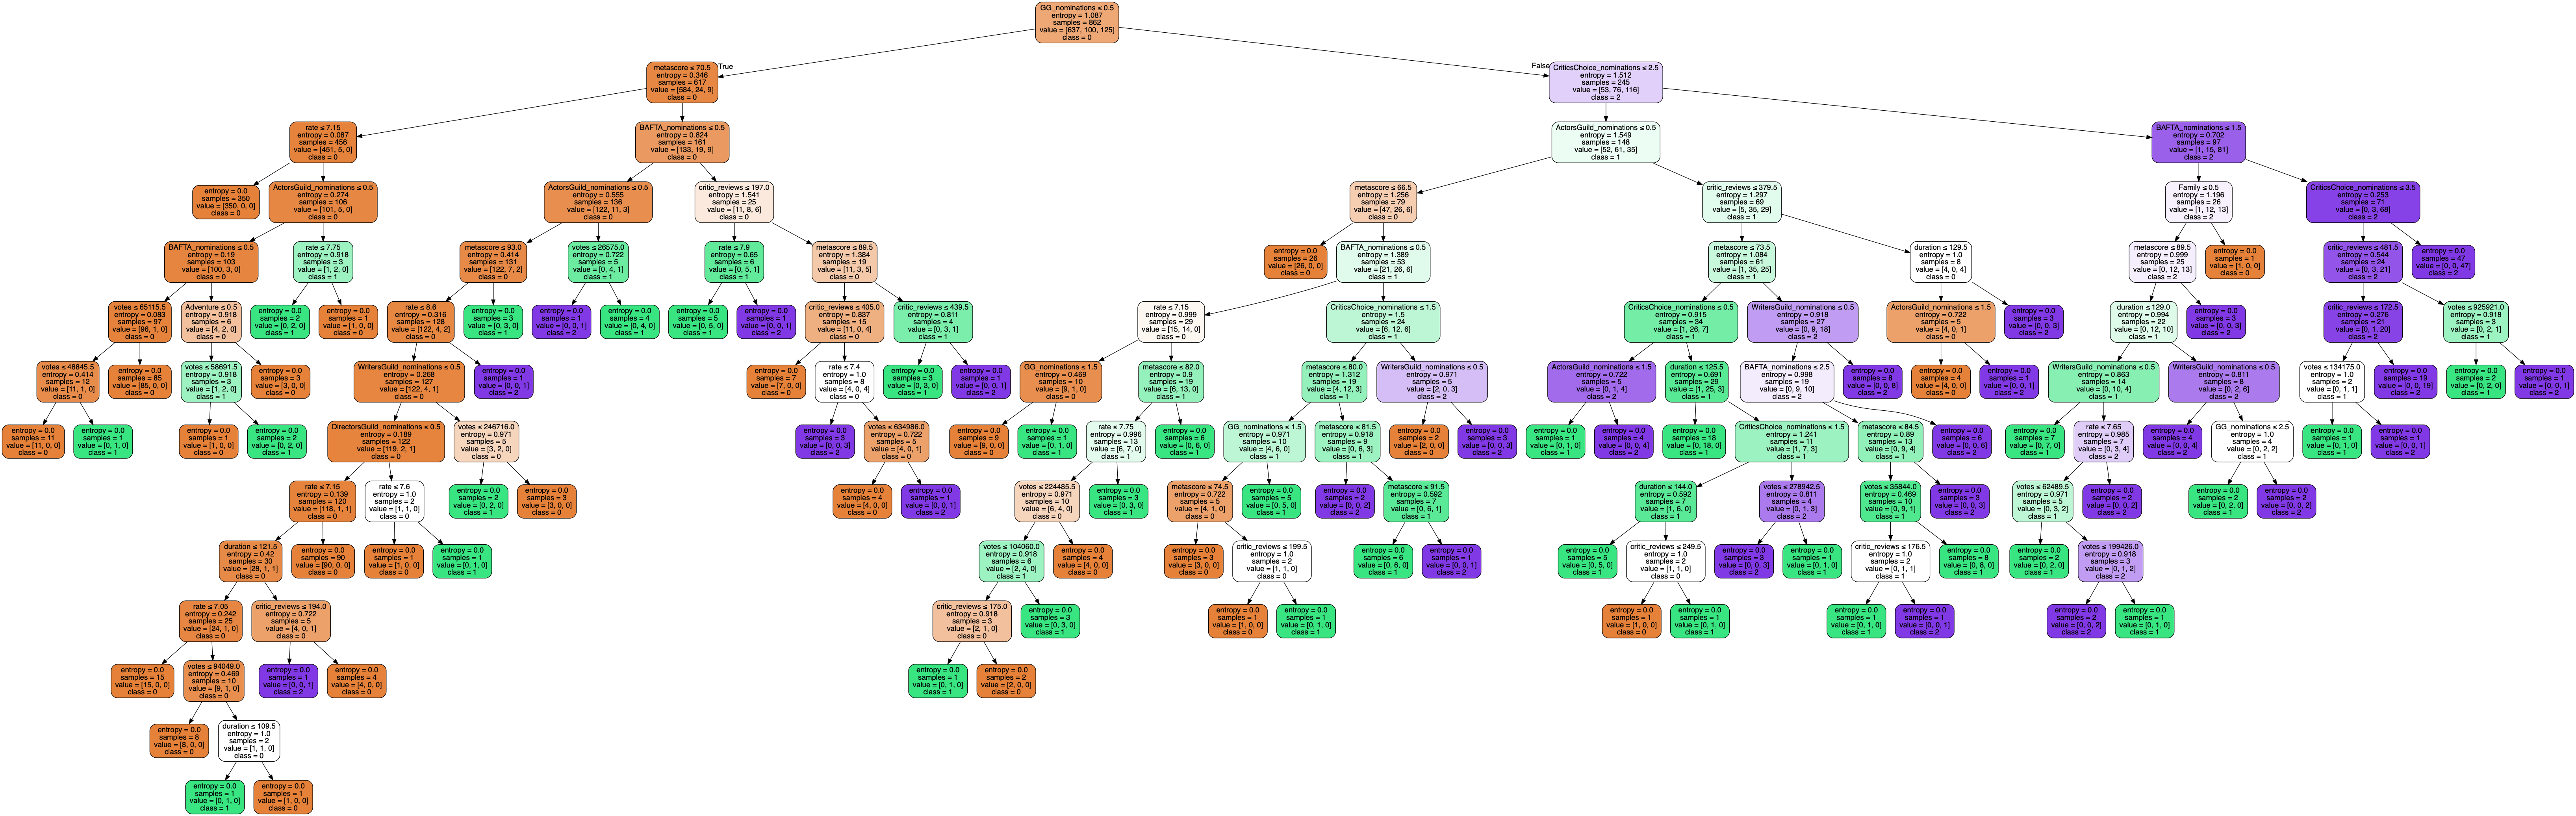

In [27]:
plotTree(tree_ig)

<i>La combinación que da el mejor Accuracy y ROC AUC Score de todas las probadas es con altura máxima 6 e Information Gain como criterio</i>

### 3. Missing Values

A continuación definimos algunas funciones que nos servirán para esta sección:

In [28]:
from sklearn.impute import SimpleImputer

# Función que rellena con NA el p porciento de las columnas de X indicadas en columns
# Parámetros: X dataset a rellenar con NA, p porcentaje de NA, columns array de nombres de 
# columnas a rellenar con NA
def fillWithNA(X, columns, p=0):
    nrows = X.shape[0]
    nsamples = int(round(p*nrows))

    if (nsamples <= 0): return X

    # Para no alterar el dataset original, ya que se pasa por referencia
    X = X.copy()
    
    for column in columns:
        # Se eligen nsamples de entre nrwos, sin reemplazo
        index = np.random.choice(nrows, size=nsamples, replace=False)

        # Reemplazo con np.nan esas posiciones
        X.loc[X.index[index], column] = np.nan
    return X

# Función que imputa un valor en cada celda que contiene un NA, según la estrategia
# de relleno indicada por strategy y by_class (moda, moda por clase, media, media por clase, etc)
def imputeValue(X, y, strategy='most_frequent', by_class=False):
    # Para no alterar el dataset original, ya que se pasa por referencia
    X = X.copy()
    
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    
    # Si es by_class, imputo por clase
    if (by_class):
        df_list = []
        for c in classes:
            indexClass = y[y['Oscar_nominations'] == c].index
            t_values = imputer.fit_transform(X.loc[indexClass].values)
            df_list.append(pd.DataFrame(t_values, index=indexClass, columns=X.columns))
        
        # Concateno los dataframes asociados a cada clase en un único dataframe
        X = pd.concat(df_list, sort=False)
    # Si no es por clase, imputo los NA de cada columna sin tener en cuenta la clase de y
    else:
        t_values = imputer.fit_transform(X.values)
        X = pd.DataFrame(t_values, index=X.index, columns=X.columns)
    
    # Devuelvo el dataframe resultante ordenado por indice
    return X.sort_index()

# Función que recorre todo el arbol y cuenta la cantidad de nodos hojas que tiene
def countLeafNodes(tree):
    n_nodes = tree_ig.tree_.node_count
    children_left = tree_ig.tree_.children_left
    children_right = tree_ig.tree_.children_right
    
    # Recorremos la estructura del arbol para ir computando la profundidad de cada nodo y si 
    # es o no un nodo hoja
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # (id del nodo, profundidad del nodo padre)
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # Si es nodo interno
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        # Sino, es nodo hoja
        else:
            is_leaves[node_id] = True

    return is_leaves[is_leaves].shape[0]

In [29]:
def classifierVsNA(classifier, percentages, strategy, by_class):
    # Acá vamos a almacenar los scores y cantidad de nodos hoja para cada porcentaje de NAs
    acc_scores, auc_scores, leaf_counts = [], [], []

    for p in percentages:
        Xna = fillWithNA(Xtrain, columns = ['GG_nominations', 'metascore', 'CriticsChoice_nominations', 'critic_reviews', 
                                            'duration', 'BAFTA_nominations', 'ActorsGuild_nominations', 'rate',
                                            'votes', 'WritersGuild_nominations'], p=p)

        Ximp = imputeValue(Xna, ytrain, strategy=strategy, by_class=by_class)

        classifier.fit(Ximp, ytrain)    

        ycv_pred = classifier.predict(Xcv)

        acc_scores.append(accuracy_score(ycv, ycv_pred))
        leaf_counts.append(countLeafNodes(classifier))
        auc_scores.append(avgAUCScore(ycv.values.ravel(), ycv_pred))

    return (np.array(acc_scores), np.array(leaf_counts), np.array(auc_scores))

In [30]:
from sklearn.model_selection import train_test_split

# Separamos el conjunto de desarrollo, un 80% en training y un 20% en test
Xtrain, Xcv, ytrain, ycv = train_test_split(Xdev, ydev, test_size=0.20, random_state=123)

Xtrain, ytrain = Xtrain.sort_index(), ytrain.sort_index()

# Cantidad de mediciones a realizar, con p de 0% a 80% de a pasos de 5% 
n_meas = 80 // 5 + 1

# Array con todos los porcentajes
percentages = np.linspace(0, .8, n_meas)

tree_ig = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

[acc_mode,leaf_mode, auc_mode] = classifierVsNA(tree_ig, percentages, 'most_frequent', False)
[acc_mean, leaf_mean, auc_mean] = classifierVsNA(tree_ig, percentages, 'mean', False)
[acc_median, leaf_median, auc_median] = classifierVsNA(tree_ig, percentages, 'median', False)

[acc_mode_byclass,leaf_mode_byclass, auc_mode_byclass] = classifierVsNA(tree_ig, percentages, 'most_frequent', True)
[acc_mean_byclass, leaf_mean_byclass, auc_mean_byclass] = classifierVsNA(tree_ig, percentages, 'mean', True)
[acc_median_byclass, leaf_median_byclass, auc_median_byclass] = classifierVsNA(tree_ig, percentages, 'median', True)

y1_acc = [acc_mode, acc_mean, acc_median]
y2_acc_byclass = [acc_mode_byclass, acc_mean_byclass, acc_median_byclass]

y1_leaf = [leaf_mode, leaf_mean, leaf_median]
y2_leaf_byclass = [leaf_mode_byclass, leaf_mean_byclass, leaf_median_byclass]

y1_auc = [auc_mode, auc_mean, auc_median]
y2_auc_byclass = [auc_mode_byclass, auc_mean_byclass, auc_median_byclass]



In [31]:
def plotMVCurves(x, y1, y2, legends, ylabel = None, title = None, axTitles = ['', '']):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig.suptitle(title, fontsize=18)

    wrap = fig.add_subplot(111, frameon=False)
    wrap.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    wrap.grid(False)
    wrap.set_xlabel("Porcentaje de valores imputados", fontdict = {'fontsize': 13})
    wrap.set_ylabel(ylabel, fontdict = {'fontsize': 13})

    ax1.set_title(axTitles[0], fontdict = {'fontsize': 13})
    ax1.grid(True)
    ax1.plot(x, y1[0], '-b', label=legends[0][0])
    ax1.plot(x, y1[1], '-g', label=legends[0][1])
    ax1.plot(x, y1[2], '-r', label=legends[0][2])
    ax1.legend(loc='lower left', frameon=False)

    ax2.set_title(axTitles[1], fontdict = {'fontsize': 13})
    ax2.grid(True)
    ax2.plot(x, y2[0], '-b', label=legends[1][0])
    ax2.plot(x, y2[1], '-g', label=legends[1][1])
    ax2.plot(x, y2[2], '-r', label=legends[1][2])
    ax2.legend(loc='lower left', frameon=False)

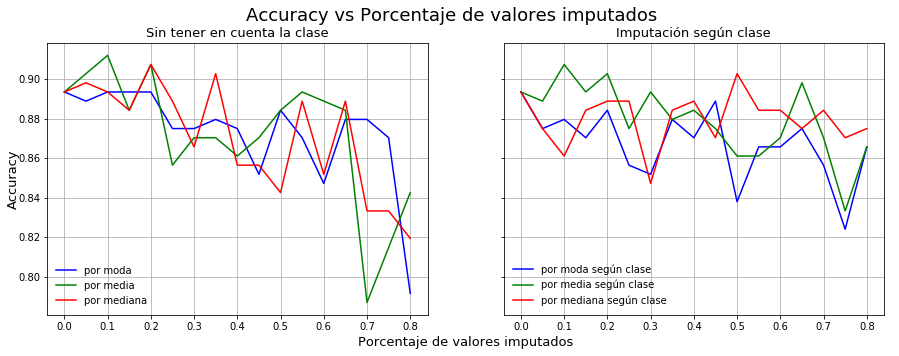

In [32]:
plt.rcParams['figure.figsize'] = [15, 5]

legends = [
    ['por moda', 'por media', 'por mediana'],
    ['por moda según clase', 'por media según clase', 'por mediana según clase']    
]

title = 'Accuracy vs Porcentaje de valores imputados'

axTitles = ['Sin tener en cuenta la clase', 'Imputación según clase']
ylabel = 'Accuracy'

plotMVCurves(percentages, y1_acc, y2_acc_byclass, legends, ylabel, title, axTitles)

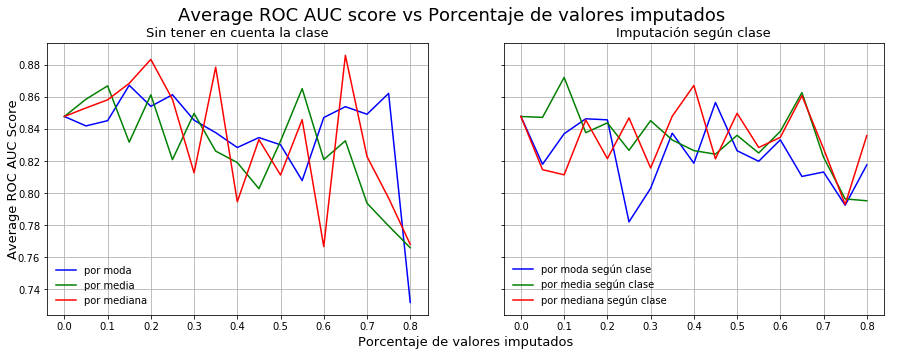

In [33]:
title = 'Average ROC AUC score vs Porcentaje de valores imputados'
ylabel = 'Average ROC AUC Score'

plotMVCurves(percentages, y1_auc, y2_auc_byclass, legends, ylabel, title, axTitles)

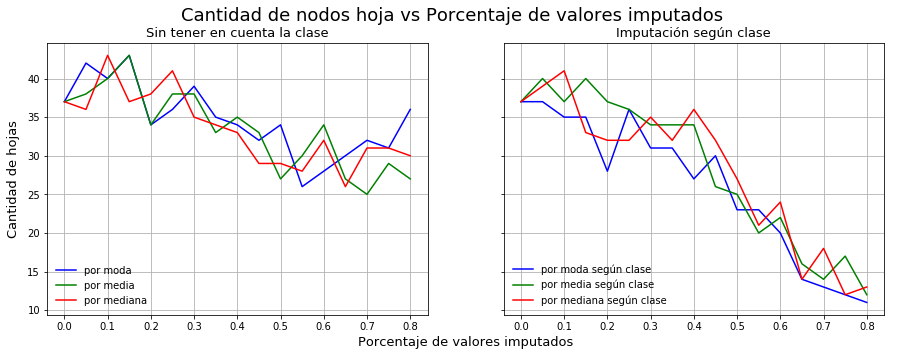

In [34]:
title = 'Cantidad de nodos hoja vs Porcentaje de valores imputados'
ylabel = 'Cantidad de hojas'

plotMVCurves(percentages, y1_leaf, y2_leaf_byclass, legends, ylabel, title, axTitles)

### 4. Tolerancia al Ruido

A continuación definimos algunas funciones que nos permitirán agregar ruido al data set y graficar la performance en función del porcentaje de ruido agregado

In [35]:
# Agrega ruido Gaussiano de media cero y varianza igual a "p" por la varianza de la columna
# Hace esto para cada columna del dataset X que se encuentra en "columns"
# Si algún valor resulta negativo, lo trunca a cero, ya que este dataset no contiene valores negativos
def addNoise(X, p=0, columns=[]):
    X = X.copy()
    Xorig = X.loc[:, columns] # Selecciono solo las columnas de interes
    Xstd = Xorig.std() * np.sqrt(p) # p * varianza = raiz(p) * desvio estandar
    Xnoisy = Xorig + np.random.normal(scale=Xstd.values, size=Xorig.shape) # Sumo el ruido gaussiano
    Xnoisy[Xnoisy < 0] = 0 # Trunco valores negativos a cero
    X.loc[:, columns] = Xnoisy # Reemplazamos las columnas cambiadas de vuelta en e dataset completo
    return X

pmax = .8

# Funcion para graficar los scores vs porcentaje de ruido
def plotNoiseCurves(x, y, color, ylabel, title):
    plt.grid(True)
    plt.title(title, fontdict = {'fontsize': 13})
    plt.plot(x, y, color)
    plt.xlabel("Porcentaje ruido", fontdict = {'fontsize': 13})
    plt.ylabel(ylabel, fontdict = {'fontsize': 13})

# Cantidad de mediciones a realizar, con p de 0% a pmax% de a pasos de 5% 
n_meas = int(pmax * 100) // 5 + 1

# Array con todos los porcentajes
percentages = np.linspace(0, pmax, n_meas)
    
# Acá vamos a almacenar los scores y cantidad de nodos hoja para cada porcentaje de ruido agregado
acc_scores, auc_scores, leaf_counts = [], [], []

for p in percentages:
    Xnoisy = addNoise(Xtrain, p=p, columns=['GG_nominations', 'metascore', 'CriticsChoice_nominations', 
                              'critic_reviews', 'duration', 'BAFTA_nominations', 'ActorsGuild_nominations', 
                              'rate', 'votes', 'WritersGuild_nominations'])
    
    tree_ig.fit(Xnoisy, ytrain)    

    ycv_pred = tree_ig.predict(Xcv)

    acc_scores.append(accuracy_score(ycv, ycv_pred))
    leaf_counts.append(countLeafNodes(tree_ig))
    auc_scores.append(avgAUCScore(ycv.values.ravel(), ycv_pred))
    
acc_scores = np.array(acc_scores)
leaf_counts = np.array(leaf_counts)
auc_scores = np.array(auc_scores)


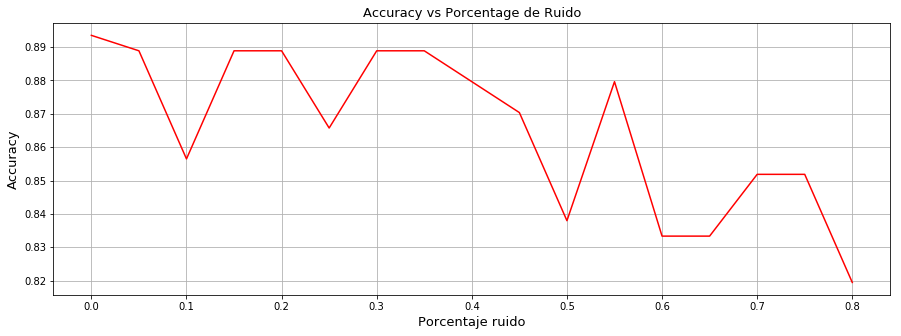

In [36]:
plotNoiseCurves(percentages, acc_scores, 'red', 'Accuracy', 'Accuracy vs Porcentage de Ruido')

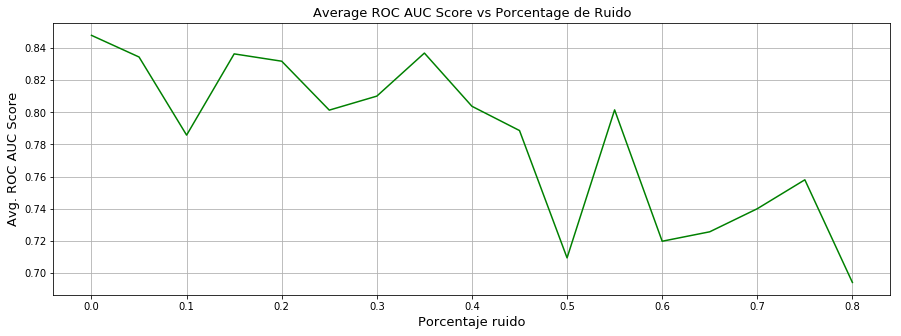

In [37]:
plotNoiseCurves(percentages, auc_scores, 'green', 'Avg. ROC AUC Score', 'Average ROC AUC Score vs Porcentage de Ruido')

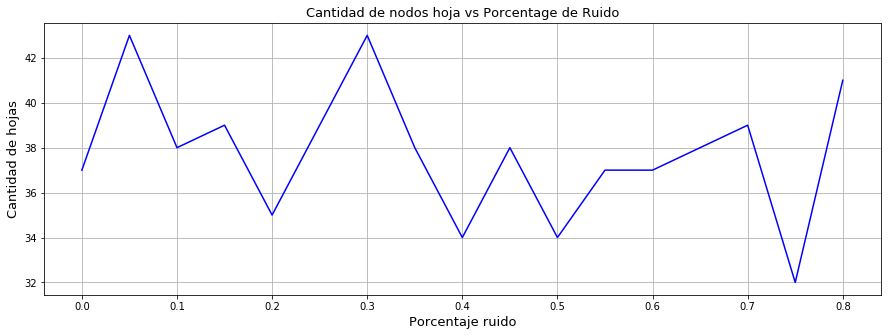

In [38]:
plotNoiseCurves(percentages, leaf_counts, 'blue', 'Cantidad de hojas', 'Cantidad de nodos hoja vs Porcentage de Ruido')

# Naives Bayes

Ahora aplicamos el algoritmo de Naives Bayes al conjunto de entrenamiento y utilizamos 5-fold cross-validation para calcular el accuracy y el ROC AUC al igual que el caso de Decision Tree. Para eso nos valemos nuevamente de la función runCV.

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

nb_bernoulli = BernoulliNB() 

results = runCV(nb_bernoulli, Xdev, ydev)

printResults('Naive Bayes Bernoulli', results)

------------ Naive Bayes Bernoulli ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.8744  0.8794  0.8794  0.8794  0.8852  0.8795  0.0038
1        CV Accuracy  0.8986  0.8791  0.8744  0.8698  0.8558  0.8755  0.0156
2   Training ROC AUC  0.8288  0.8298  0.8365  0.8376  0.8421  0.8349  0.0056
3         CV ROC AUC  0.8586  0.8591  0.8263  0.7988  0.8041  0.8294  0.0288

In [40]:
nb_gaussian = GaussianNB()

results = runCV(nb_gaussian, Xdev, ydev)

printResults('Naive Bayes Gaussian', results)

------------ Naive Bayes Gaussian ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.7477  0.7575  0.7564  0.7622  0.7587  0.7565  0.0054
1        CV Accuracy  0.7558  0.7349  0.7581  0.7767  0.7302  0.7512  0.0189
2   Training ROC AUC  0.5965  0.6019  0.6121  0.6100  0.6075  0.6056  0.0064
3         CV ROC AUC  0.5655  0.5896  0.6156  0.6325  0.6004  0.6007  0.0255

In [41]:
nb_multinomial = MultinomialNB()

results = runCV(nb_multinomial, Xdev, ydev)

printResults('Naive Bayes Multinomial', results)

------------ Naive Bayes Multinomial ------------


Medición  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5   Media  Desvío
0  Training Accuracy  0.6221  0.5963  0.6647  0.4304  0.6067  0.5840  0.0898
1        CV Accuracy  0.6452  0.6279  0.6558  0.4419  0.5581  0.5858  0.0890
2   Training ROC AUC  0.6152  0.5987  0.6973  0.6461  0.6245  0.6363  0.0381
3         CV ROC AUC  0.6342  0.6113  0.6851  0.6327  0.5616  0.6250  0.0446

Vemos que Bernoulli es el que mejor resultado arroja, tanto para accuracy como para AUC ROC.
A continuación entrenamos el modelo usando el 98% del conjunto de desarrollo e informamos las probabilidades a priori (de clase). El 2% lo dejamos para predecir e informar las probabilidades condicionales de observaciones nueva (probabilidad de pertenecia a la clase dado que conozco los features).

In [42]:
Xtrain, Xcv, ytrain, ycv = train_test_split(Xdev, ydev, test_size=0.009, random_state=0)

# Entrena el modelo usando el conjunto de entrenamiento
nb_bernoulli.fit(Xtrain, ytrain.values.ravel())

# Predice con el conjunto CV
ypred = nb_bernoulli.predict(Xcv)

# Probabilidades condicionales de las nuevas observaciones
prob_cond = nb_bernoulli.predict_proba(Xcv)

# De modelo puedo extraer el logaritmo natural de las probabilidades de clase, 
# con lo cual aplico la función exponencial para obtener las probabilidades
prior_prob = np.exp(nb_bernoulli.class_log_prior_) 

print("Probabilidades a priori:")
print("Clase 0: ", prior_prob[0])
print("Clase 1: ", prior_prob[1])
print("Clase 2: ", prior_prob[2])

print()
print("Probabilidades Condicionales:")
pd.DataFrame(data=prob_cond.round(4).T, columns=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'], index=["Clase 0", "Clase 1", "Clase 2"])


Probabilidades a priori:
Clase 0:  0.7394564198687906
Clase 1:  0.1152764761012183
Clase 2:  0.14526710402999063

Probabilidades Condicionales:


s1      s2   s3      s4      s5      s6      s7      s8      s9  \
Clase 0  0.0012  0.9989  1.0  0.9989  0.0000  0.9906  0.1401  0.9997  0.7498   
Clase 1  0.1251  0.0011  0.0  0.0011  0.4026  0.0093  0.7678  0.0003  0.2419   
Clase 2  0.8737  0.0000  0.0  0.0000  0.5973  0.0001  0.0920  0.0000  0.0083   

            s10  
Clase 0  0.9998  
Clase 1  0.0002  
Clase 2  0.0000

# Comparacion Naive Bayes y Decision Tree

A continuación aplicamos GridSearch al conjunto de desarrollo para encontrar los mejores hiperparámetros del DecisionTree. Utilizamos 5-fold cross validation y el ROC AUC promedio como score (de acuerdo a lo pedido en la consigna). 
</br>Los hiperparametros a buscar son:
- max_depth: de 3 a 10
- criterion: Gini o Entropia
- min_samples_split: de 4 a 10
- min_samples_leaf: de 5 a 15
- max_leaf_nodes: de 10 a 120 en pasos de 10

In [43]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos un custom scorer en base a la funcion avgAUCScore definida antes
# Este scorer lo utilizamos en GridSearch para que busque los parámetros optimos en base
# al promedio de ROC AUC para cada clase, ya que no se puede usar roc_auc_score para mas de 2 clases
avg_roc_auc_score = make_scorer(avgAUCScore, greater_is_better=True)

# Hacemos un grid search para determinar cuales son los mejores parametros para el arbol
# Los parametros en este caso son la altura del arbol (en este caso, probamos de 3 a 20) 
# y el tipo validacion (Gini o Information Gain)
parameters = {'max_depth':range(3,10), 'criterion': ['gini', 'entropy'], 'min_samples_split':range(4,10),
             'min_samples_leaf':range(5,15), 'max_leaf_nodes': range(10,120,10)}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1, cv = 5, scoring = avg_roc_auc_score)
clf.fit(Xdev, ydev)

# Guardo el modelo con los mejores hiperparametros
best_tree = clf.best_estimator_

bold = '\033[1m'
end = '\033[0m'

title = 'Gridsearch para el Desicion Tree'
print('{}------------ {} ------------{}'.format(bold, title, end))
print('Mejor score (ROC AUC): ', clf.best_score_)
print('Mejores parámetros: ', clf.best_params_)



------------ Gridsearch para el Desicion Tree ------------
Mejor score (ROC AUC):  0.8353369450732605
Mejores parámetros:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 8}


Ahora aplicamos un GridSearch sobre el parámetro alpha de BernoulliNB, que le agrega smoothing para regularización:


In [44]:
parameters = {'alpha':np.arange(0.01,1,0.01)}

clf = GridSearchCV(BernoulliNB(), parameters, n_jobs=-1, cv = 5, scoring = avg_roc_auc_score)
clf.fit(Xdev, ydev.values.ravel())

# Guardo el modelo con los mejores hiperparametros
best_nb = clf.best_estimator_

title = 'Gridsearch para el Naive Bayes'
print('{}------------ {} ------------{}'.format(bold, title, end))
print('Mejor score (ROC AUC): ', clf.best_score_)
print('Mejores parámetros: ', clf.best_params_)


------------ Gridsearch para el Naive Bayes ------------
Mejor score (ROC AUC):  0.8322910756626133
Mejores parámetros:  {'alpha': 0.4}


Finalmente, entrenamos ambos algoritmos con los datos de desarrollo completos y calculamos Accuracy y ROC AUC sobre los datos de testing, separados al principio (nominaciones al Oscar 2016 a 2018) 

In [45]:
# Entrena el modelo usando el conjunto de entrenamiento
best_tree.fit(Xdev, ydev.values.ravel())

# Predice con el conjunto CV
ypred_tree = best_tree.predict(Xtest)

title = 'Decision Tree: resultados sobre los datos de test'
print('{}{}{}'.format(bold, title, end))
print('ROC AUC Promedio: ', avgAUCScore(ytest.values.ravel(), ypred_tree))
print('Accuracy: ', accuracy_score(ytest.values.ravel(), ypred_tree))

Decision Tree: resultados sobre los datos de test
ROC AUC Promedio:  0.8173277439773216
Accuracy:  0.8114754098360656


In [46]:
# Entrena el modelo usando el conjunto de entrenamiento
best_nb.fit(Xdev, ydev.values.ravel())

# Predice con el conjunto CV
ypred_nb = best_nb.predict(Xtest)

title = 'Naive Bayes: resultados sobre los datos de test'
print('{}{}{}'.format(bold, title, end))
print('ROC AUC Promedio: ', avgAUCScore(ytest.values.ravel(), ypred_nb))
print('Accuracy: ', accuracy_score(ytest.values.ravel(), ypred_nb))

Naive Bayes: resultados sobre los datos de test
ROC AUC Promedio:  0.8231304211913856
Accuracy:  0.819672131147541


Definimos una función que plotea de una forma visual la matriz de confusión:

In [47]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Reds):
    if not title:
        title = "Matriz de Confusión"

    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


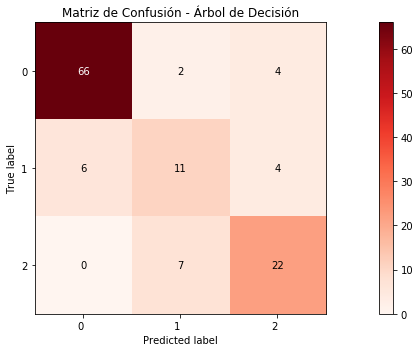

In [48]:
plot_confusion_matrix(ytest.values.ravel(), ypred_tree, classes=classes, title="Matriz de Confusión - Árbol de Decisión")

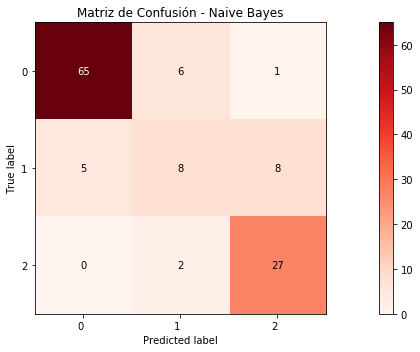

In [49]:
plot_confusion_matrix(ytest.values.ravel(), ypred_nb, classes=classes, title="Matriz de Confusión - Naive Bayes")